
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>
 
 
# Laboratorio: Análisis y Modelado de Series Temporales con SARIMAX

En este laboratorio, practicarás el análisis y modelado de series temporales utilizando el modelo SARIMAX. 
Objetivos del laboratorio

- Analizar series temporales:
	
    - Identificar tendencias, estacionalidad y posibles rupturas estructurales en los datos.
	
    - Verificar la estacionaridad de la serie mediante pruebas estadísticas y visuales.
	
    - Realizar análisis de autocorrelación (ACF) y autocorrelación parcial (PACF).

- Modelar la serie temporal:
	
    - Ajustar un modelo SARIMAX adecuado para los datos proporcionados.
	
    - Evaluar los resultados del modelo e interpretar los parámetros obtenidos.

- Interpretar gráficas y resultados:
	
    - Explicar de forma detallada el significado de las gráficas y resultados generados durante cada etapa del análisis.

# Instrucciones

- Parte 1: Carga y exploración inicial de los datos

    - Descarga el conjunto de datos proporcionado, que contiene una serie temporal de valores relacionados con ventas mensuales de una empresa ficticia durante los últimos 5 años.

    - Realiza una exploración inicial:

        - Gráfica la serie temporal completa para identificar posibles tendencias y estacionalidades.

        - Comenta tus observaciones iniciales sobre los patrones que encuentres.

- Parte 2: Estacionaridad


    - Evalúa si la serie es estacionaria:

    - Aplica el test de Dickey-Fuller aumentado (ADF).

    - Si es necesario, realiza transformaciones (diferenciación o logaritmos) para convertir la serie en estacionaria.

    - Genera una gráfica comparativa que muestre la serie original y la transformada, indicando las diferencias visuales.

    - Escribe una interpretación de los resultados del test ADF y de la gráfica.

- Parte 3: Análisis de autocorrelaciones


    - Genera los gráficos de ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function).

    - Identifica:

        - El orden de diferenciación necesario (si aún no lo has hecho).

        - Los posibles valores para los parámetros p y q del modelo SARIMAX.

    - Explica qué indican las autocorrelaciones encontradas y cómo las utilizarás para definir los parámetros del modelo.

- Parte 4: Ajuste del modelo SARIMAX


    - Ajusta un modelo SARIMAX utilizando los parámetros identificados.

    - Evalúa el ajuste:

        - Observa los residuos del modelo.

        - Verifica si cumplen las condiciones de ruido blanco mediante análisis visual y pruebas estadísticas.

    - Ajusta el modelo si es necesario, iterando sobre los parámetros.

- Parte 5: Interpretación y predicción


    - Interpreta los coeficientes estimados del modelo (incluyendo estacionalidad y efectos externos si aplican).

    - Genera una predicción para los próximos 12 meses.

    - Gráfica las predicciones junto con la serie temporal original.

    - Comenta sobre:

        - La calidad de las predicciones.

        - La utilidad del modelo para la toma de decisiones.



In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Visualizaciones
# -----------------------------------------------------------------------
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


# Analisis Exploratorio Series Temporales
# -----------------------------------------------------------------------
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Modelo Series Temporales
# -----------------------------------------------------------------------
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product


# Otros
# -----------------------------------------------------------------------
from tqdm import tqdm

import src.soporte_clustering as sc

In [2]:
df = pd.read_csv("datos/Truck_sales.csv")
df

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223
...,...,...
139,14-Aug,933
140,14-Sep,704
141,14-Oct,639
142,14-Nov,571


In [3]:
df.dtypes

Month-Year            object
Number_Trucks_Sold     int64
dtype: object

In [4]:
df['Month-Year'] = pd.to_datetime(df["Month-Year"], format='%y-%b')
df = df.rename(columns = {"Month-Year": "Date"})


In [5]:
df.dtypes

Date                  datetime64[ns]
Number_Trucks_Sold             int64
dtype: object

In [6]:
df.set_index("Date", inplace=True)

In [7]:
sc.Exploracion(df).explorar_datos()

5 registros aleatorios:


,Number_Trucks_Sold
Date,
2011-06-01,650
2013-05-01,777
2005-04-01,276
2007-08-01,419
2004-08-01,262




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Number_Trucks_Sold  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


Duplicados en el DataFrame:
21


Estadísticas descriptivas de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Number_Trucks_Sold,144.0,428.729167,188.633037,152.0,273.5,406.0,560.25,958.0




Estadísticas descriptivas de las columnas categóricas:
No hay columnas categóricas en el DataFrame.


Número de valores nulos por columna:
Number_Trucks_Sold    0
dtype: int64


Matriz de correlación entre variables numéricas:


,Number_Trucks_Sold
Number_Trucks_Sold,1.0


In [8]:
df_copia = df.copy()
df_copia["Month"] = df.index.month_name()
df_copia["Year"] = df.index.year
df_copia

,Number_Trucks_Sold,Month,Year
Date,,,
2003-01-01,155,January,2003
2003-02-01,173,February,2003
2003-03-01,204,March,2003
2003-04-01,219,April,2003
2003-05-01,223,May,2003
...,...,...,...
2014-08-01,933,August,2014
2014-09-01,704,September,2014
2014-10-01,639,October,2014


In [9]:
df_copia = df_copia.asfreq("MS")
df_copia.index

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='Date', length=144, freq='MS')

In [10]:
fecha_completa = pd.date_range(df_copia.index.min(), df_copia.index.max(), freq="MS")
mes_anio_completo = fecha_completa.to_period("M")
mes_anio_actual = df_copia.index.to_period("M")
mes_anio_completo.difference(mes_anio_actual)

PeriodIndex([], dtype='period[M]')

In [11]:
df_copia.head(2)

,Number_Trucks_Sold,Month,Year
Date,,,
2003-01-01,155,January,2003
2003-02-01,173,February,2003


<Axes: xlabel='Date', ylabel='Number_Trucks_Sold'>

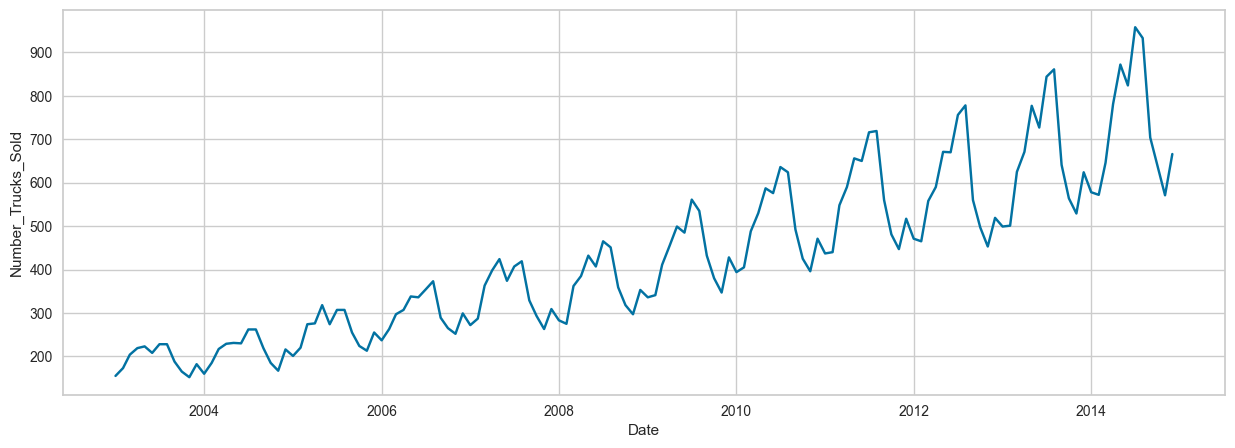

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df_copia.index,
             y = df_copia["Number_Trucks_Sold"],
             data = df_copia)

<Axes: xlabel='Month', ylabel='Number_Trucks_Sold'>

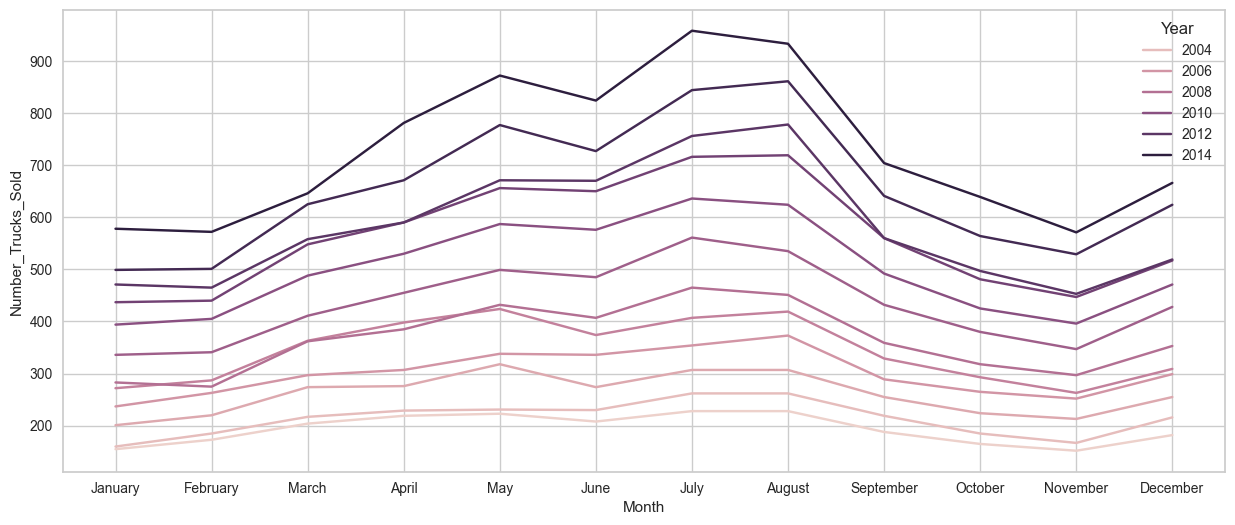

In [13]:
plt.figure(figsize=(15,6))
sns.lineplot(
    x = "Month",
    y = "Number_Trucks_Sold",
    hue = "Year",
    data = df_copia
)

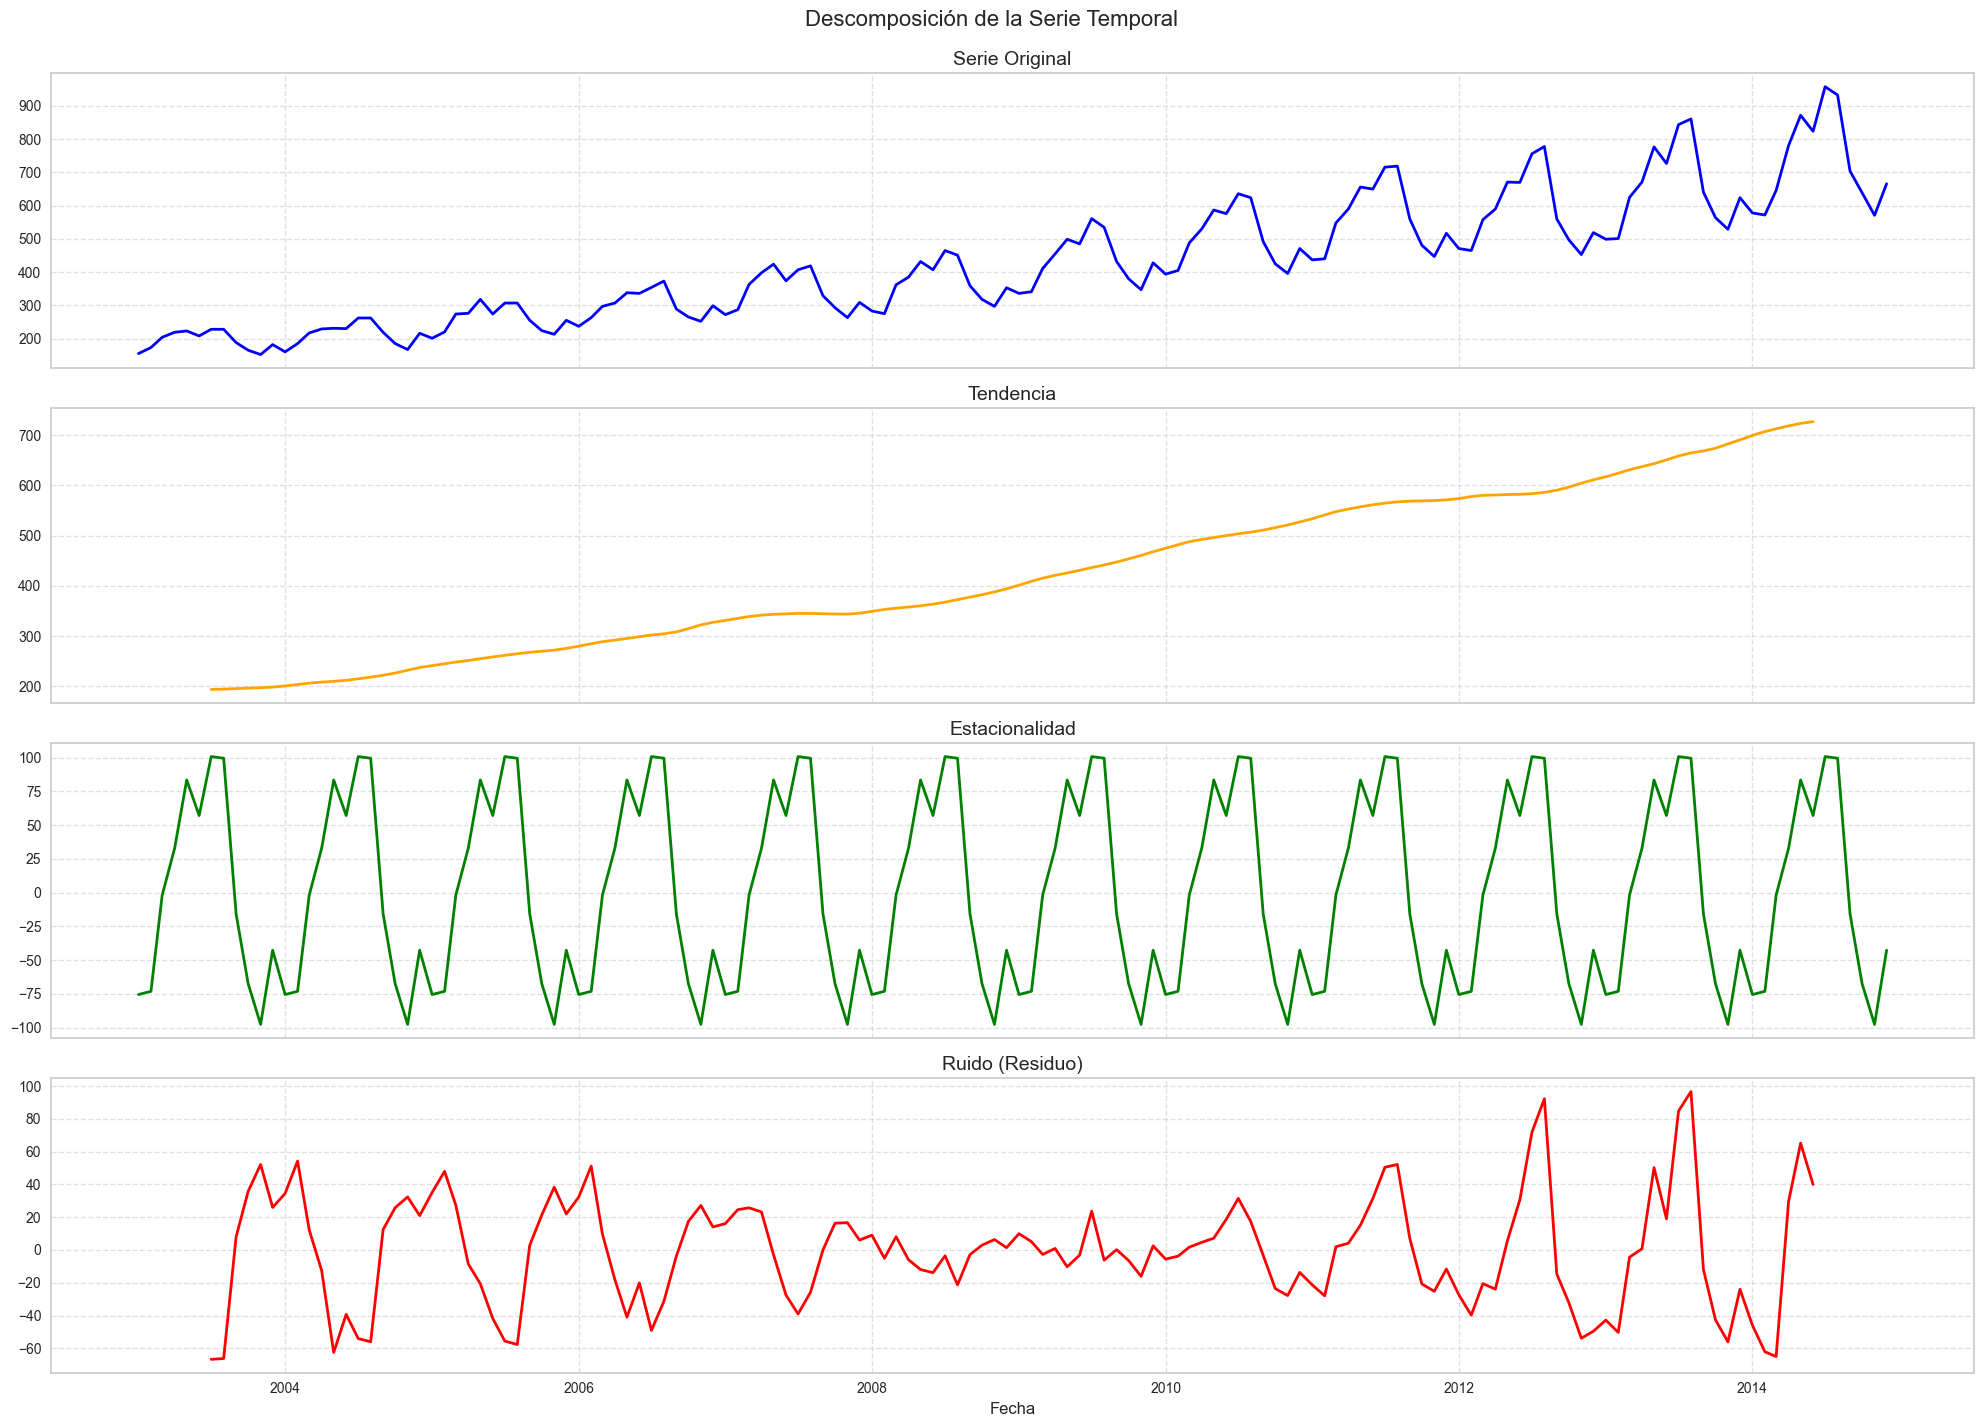

In [14]:
decomposition = seasonal_decompose(df["Number_Trucks_Sold"], model='additive', period=12)

# Crear figura y subplots
fig, axes = plt.subplots(4, 1, figsize= (20, 15), sharex=True)

# Serie original
axes[0].plot(df["Number_Trucks_Sold"], color="blue", linewidth=2)
axes[0].set_title("Serie Original", fontsize=14)
axes[0].grid(visible=True, linestyle="--", alpha=0.6)

# Tendencia
axes[1].plot(decomposition.trend, color="orange", linewidth=2)
axes[1].set_title("Tendencia", fontsize=14)
axes[1].grid(visible=True, linestyle="--", alpha=0.6)

# Estacionalidad
axes[2].plot(decomposition.seasonal, color="green", linewidth=2)
axes[2].set_title("Estacionalidad", fontsize=14)
axes[2].grid(visible=True, linestyle="--", alpha=0.6)

# Ruido
axes[3].plot(decomposition.resid, color="red", linewidth=2)
axes[3].set_title("Ruido (Residuo)", fontsize=14)
axes[3].grid(visible=True, linestyle="--", alpha=0.6)

# Ajustar diseño
plt.suptitle("Descomposición de la Serie Temporal", fontsize=16, y=0.95)
plt.xlabel("Fecha", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

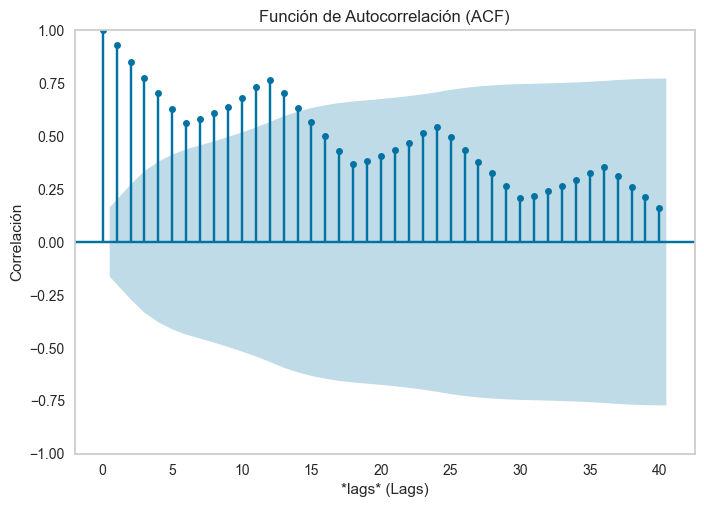

In [15]:
# GRAFICO DE LA AUTOCORRELACIÓN
plot_acf(df, lags=40)  
plt.title("Función de Autocorrelación (ACF)")
plt.xlabel("*lags* (Lags)")
plt.ylabel("Correlación")
plt.grid();

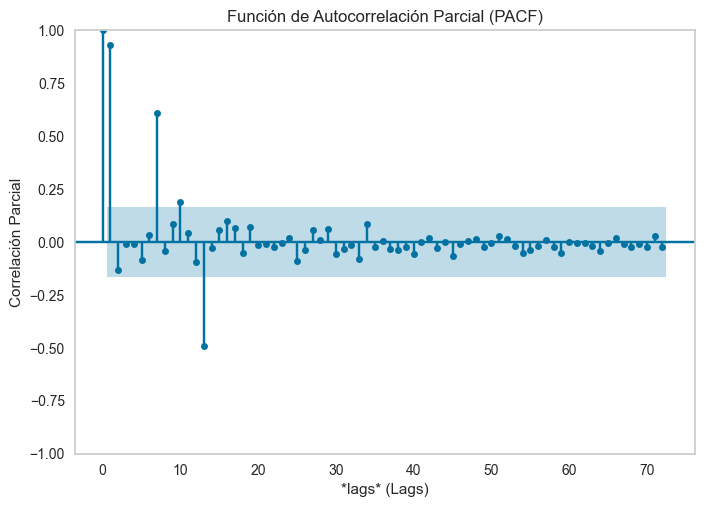

In [16]:
# Graficar la autocorrelación parcial
plot_pacf(df, lags=72, method='ywm')  # Cambia 'method' según tu versión
plt.title("Función de Autocorrelación Parcial (PACF)")
plt.xlabel("*lags* (Lags)")
plt.ylabel("Correlación Parcial")
plt.grid()
plt.show()

In [17]:
datos_test = int(np.round(df.shape[0] * 0.2, 0))
y_train = df.iloc[:-datos_test]
y_test = df.iloc[-datos_test:]

In [18]:
ps = range(1, 4)
qs = range(1, 11)

combinaciones = list(product(ps, qs))
combinaciones[:3]

[(1, 1), (1, 2), (1, 3)]

In [19]:
resultados = {"p": [], "q": [], "rmse": []}
for p, q in combinaciones:
    modelo_sarima = SARIMAX(
        y_train,
        order = (p, #p
                1, #d
                q #q
                ),
        seasonal_order = (1, #P
                        1, #D
                        1, #Q
                        12 #S
                        )
    ).fit(disp = False)
    pred_y_test = modelo_sarima.predict(start=len(y_train), end=len(df)-1)
    rmse = np.sqrt(mean_squared_error(pred_y_test, y_test))
    resultados["p"].append(p)
    resultados["q"].append(q)
    resultados["rmse"].append(rmse)

pd.DataFrame(resultados).sort_values("rmse", ascending=True)

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ivigo\AppData\Local\Programs\Python\Python312\L

,p,q,rmse
2,1,3,43.018239
20,3,1,43.347973
6,1,7,43.925620
5,1,6,44.002567
12,2,3,44.021528
7,1,8,44.024269
17,2,8,44.042435
27,3,8,44.082895
8,1,9,44.151029
16,2,7,44.255917


In [27]:
# Una vez sabemos cual es el que funciona introducimos los valores fijos
modelo_sarima = SARIMAX(
        df,
        order = (1, #p
                1, #d
                3 #q
                ),
        seasonal_order = (1, #P
                        1, #D
                        1, #Q
                        12 #S
                        )
    ).fit(disp = False)
pred_y_test = modelo_sarima.predict(start=len(df), end=len(df)+12)
pred_y_test = pred_y_test.astype(int)

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
# La parte buena
df_predichos = pd.DataFrame(pred_y_test)
df_predichos = df_predichos.rename(columns={"predicted_mean": "Number_Trucks_Sold_predichos"})
# df_predichos.set_index("Date")
df_predichos

,Number_Trucks_Sold_predichos
2015-01-01,625
2015-02-01,621
2015-03-01,705
2015-04-01,838
2015-05-01,932
2015-06-01,877
2015-07-01,1013
2015-08-01,990
2015-09-01,765
2015-10-01,697


<Axes: xlabel='Date', ylabel='Number_Trucks_Sold'>

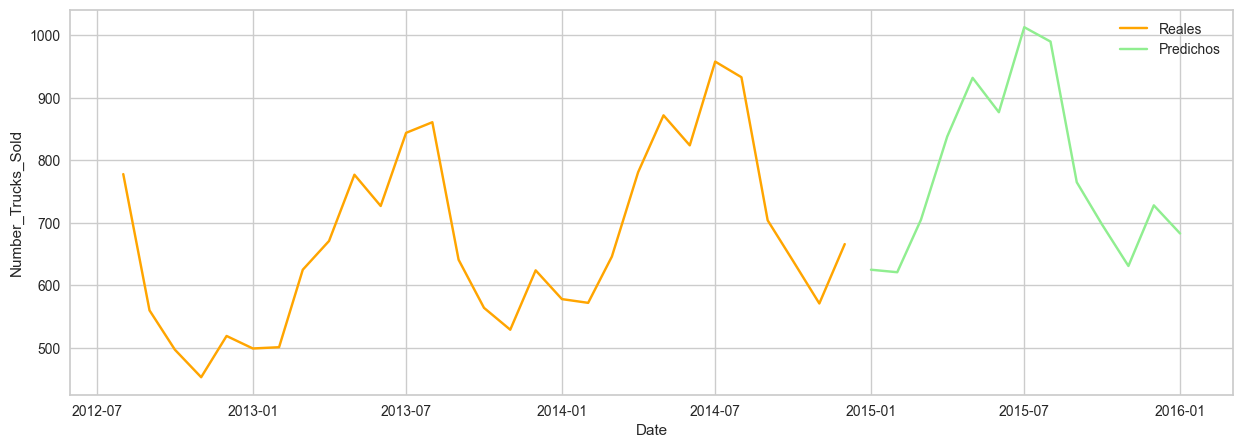

In [48]:
plt.figure(figsize=(15, 5))
sns.lineplot(x = y_test.index, y = "Number_Trucks_Sold", data = y_test, label = "Reales", color="orange")
sns.lineplot(x = df_predichos.index, y = "Number_Trucks_Sold_predichos", data = df_predichos, label = "Predichos", legend=True, color="lightgreen")